# Testing Reversal

In [1]:
import numpy as np
import matplotlib.pylab as plt

# Global variables
DIM = 8

############################ INITIALISE VARIABLES #######################################
game_over = False
turn = 1
error = False
p1_score = 0
p2_score = 0

##################################### FUNCTIONS ##########################################

# Function to Initiate Board
def create_board():
    board = np.zeros((DIM,DIM))
    board[3][3] = 1
    board[4][4] = 1
    board[3][4] = 2
    board[4][3] = 2
    return board

# Function to check if player can place piece.
def can_play(board, piece):
    for r in range(DIM):
        for c in range(DIM):
            if is_vacant(board, r, c, piece):
                if is_reversible(board, r, c, piece):
                    return True
    return False

# Function to check if location is vacant.
def is_vacant(board, row, col, piece):
    # print("Check vacant")
    return board[row][col] == 0

# Determine if the placement of piece will lead to any reversals
def is_reversible(board, row, col, piece):
    # print("Determine Reversible")

    # Check right:
    if (col+1) <= DIM:
        # print(" determine right")
        for c in range(col+1, DIM): # Start from the one to the right, not itself
            if c == (col+1):
                if board[row][c] == 0 or board[row][c] == piece:
                    break
            else:
                if board[row][c] == 0:
                    break
                if board[row][c] == piece:
                    return True

    # Check left (must check from right to left):
    if (col-1) >= 0:
        # print(" determine left")
        for c in range(col-1, 0, -1):
            if c == (col-1):
                if board[row][c] == 0 or board[row][c] == piece:
                    break
            else:
                if board[row][c] == 0:
                    break
                if board[row][c] == piece:
                    return True

    # Check up (must check from down to up):
    if (row-1) >= 0:
        # print(" determine up")
        for r in range(row-1, 0, -1):
            if r==(row-1):
                if board[r][col] == 0 or board[r][col] == piece:
                    break
            else:
                if board[r][col] == 0:
                    break
                if board[r][col] == piece:
                    return True

    # Check down:
    if (row+1) <= DIM:
        # print(" determine down")
        for r in range(row+1, DIM):
            if r == (row+1):
                if board[r][col] == 0 or board[r][col] == piece:
                    break
            else:
                if board[r][col] == 0:
                    break
                if board[r][col] == piece:
                    return True

    # Check positive diagonal, left of chess (going up to the right, so rows decreasing):
    if (col-1) >= 0:
        row_it = row+1
        # print(" determine +ve diagonal left")
        for c in range(col-1, 0, -1):
            if (row_it) >= DIM:
                break
            if c==(col-1):
                if board[row_it][c] == 0 or board[row_it][c] == piece:
                    break
            else:
                if board[row_it][c] == 0:
                    break
                if board[row_it][c] == piece:
                    # print("     location: row=", row_it, ", col=",c)
                    return True
            row_it = row_it + 1

    # Check positive diagonal, right of chess:
    if (col+1) <= DIM:
        row_it = row-1
        # print(" determine +ve diagonal right")
        for c in range(col+1, DIM):
            if (row_it) < 0:
                break
            if c==(col+1):
                if board[row_it][c] == 0 or board[row_it][c] == piece:
                    break
            else:
                if board[row_it][c] == 0:
                    break
                if board[row_it][c] == piece:
                    return True
            row_it = row_it - 1

    # Check negative diagonal, left of chess:   
    if (col-1) >= 0:
        row_it = row-1
        # print(" determine -ve diagonal left")
        for c in range(col-1, 0, -1):
            if (row_it) < 0:
                break
            if c==(col-1):
                if board[row_it][c] == 0 or board[row_it][c] == piece:
                    break
            else:
                if board[row_it][c] == 0:
                    break
                if board[row_it][c] == piece:
                    return True
            row_it = row_it - 1

    # Check negative diagonal, right of chess:
    if (col+1) <= DIM:
        row_it = row+1
        # print(" determine -ve diagonal right")
        for c in range(col+1, DIM):
            if (row_it) >= DIM:
                break
            if c==(col+1):
                if board[row_it][c] == 0 or board[row_it][c] == piece:
                    break
            else:
                if board[row_it][c] == 0:
                    break
                if board[row_it][c] == piece:
                    return True
            row_it = row_it + 1
    
    # Return false if cannot find any reversible pieces
    return False

# Drop piece, find nearest piece (with opponent in between) in vert/horz/diag axis and reverse the pieces
def drop_piece(board, row, col, piece):

    flip_num = 0

    # print("Drop piece and reverse")
    board[row][col] = piece

    # Variables
    reverse = False
    opp_row = row # identified row of the other chess
    opp_col = col # identified column of the other chess

    # Reverse pieces on the right:
    if (col+1) <= DIM:
        # print ("    check right", row, col)
        for c in range(col+1, DIM): # Start from the one to the right, not itself
            if board[row][c] == 0:
                break
            if board[row][c] == piece:
                reverse = True
                opp_col = c
                break
        if reverse == True:
            for c in range(col+1, opp_col):
                board[row][c] = piece
                flip_num = flip_num+1
                # print("         reverse piece at row=", row, ", col=",c)
        reverse = False

    # Reverse left (must check from right to left):
    if (col-1) >= 0:
        # print ("    check left", row, col)
        for c in range(col-1, 0, -1):
            if board[row][c] == 0:
                break
            if board[row][c] == piece:
                reverse = True
                opp_col = c
                break
        if reverse == True:
            for c in range(col-1, opp_col, -1):
                board[row][c] = piece
                flip_num = flip_num+1
                # print("         reverse piece at row=", row, ", col=",c)
        reverse = False

    # Reverse up (must check from down to up):
    if (row-1) >= 0:
        # print ("    check up", row, col)
        for r in range(row-1, 0, -1):
            if board[r][col] == 0:
                break
            if board[r][col] == piece:
                reverse = True
                opp_row = r
                break
        if reverse == True:
            for r in range(row-1, opp_row, -1):
                board[r][col] = piece
                flip_num = flip_num+1
                # print("         reverse piece at row=", r, ", col=",col)
        reverse = False

    # Reverse down:
    if (row-1) <= DIM:
        # print ("    check down", row, col)
        for r in range(row+1, DIM):
            if board[r][col] == 0:
                break
            if board[r][col] == piece:
                reverse = True
                opp_row = r
                break
        if reverse == True:
            for r in range(row+1, opp_row):
                board[r][col] = piece
                flip_num = flip_num+1
                # print("         reverse piece at row=", r, ", col=",col)
        reverse = False

    # Reverse positive diagonal, left of chess (going up to the right, so rows decreasing):
    if (col-1) >= 0:
        # print ("    check positive diagonal left", row, col)
        row_it = row+1
        for c in range(col-1, 0, -1):
            if (row_it) >= DIM or board[row_it][c] == 0:
                break
            if board[row_it][c] == piece:
                reverse = True
                opp_row = row_it
                opp_col = c
                break
            row_it = row_it + 1
        if reverse == True:
            row_it = row+1
            for c in range (col-1, opp_col, -1):
                board[row_it][c] = piece
                flip_num = flip_num+1
                # print("         reverse piece at row=", row_it, ", col=",c)
                row_it = row_it + 1
        reverse = False

    # Reverse positive diagonal, right of chess:
    if (col+1) <= DIM:
        # print ("    check positive diagonal right", row, col)
        row_it = row-1
        for c in range(col+1, DIM):
            if (row_it) < 0 or board[row_it][c] == 0:
                break
            if board[row_it][c] == piece:
                reverse = True
                opp_row = row_it
                opp_col = c
                break
            row_it = row_it - 1
        if reverse == True:
            row_it = row-1
            for c in range (col+1, opp_col):
                board[row_it][c] = piece
                flip_num = flip_num+1
                # print("         reverse piece at row=", row_it, ", col=",c)
                row_it = row_it - 1
        reverse = False

    # Reverse negative diagonal, left of chess:
    if (col-1) >= 0:
        # print ("    check negative diagonal left", row, col)
        row_it = row-1
        for c in range(col-1, 0, -1):
            if (row_it) < 0 or board[row_it][c] == 0:
                break
            if board[row_it][c] == piece:
                reverse = True
                opp_row = row_it
                opp_col = c
                break
            row_it = row_it - 1
        if reverse == True:
            row_it = row-1
            for c in range (col-1, opp_col, -1):
                board[row_it][c] = piece
                flip_num = flip_num+1
                # print("         reverse piece at row=", row_it, ", col=",c)
                row_it = row_it - 1
        reverse = False

    # Reverse negative diagonal, right of chess:
    if (col+1) <= DIM:
        # print ("    check negative diagonal right", row, col)
        row_it = row+1
        for c in range(col+1, DIM):
            if (row_it) >= DIM or board[row_it][c] == 0:
                break
            if board[row_it][c] == piece:
                reverse = True
                opp_row = row_it
                opp_col = c
                break
            row_it = row_it + 1
        if reverse == True:
            row_it = row+1
            for c in range (col+1, opp_col):
                board[row_it][c] = piece
                flip_num = flip_num+1
                # print("         reverse piece at row=", row_it, ", col=",c)
                row_it = row_it + 1
        reverse = False
    
    return flip_num

# Print board and scores
def print_board(board, flip_num): # 
    p1_score = np.count_nonzero(board==1)
    p2_score = np.count_nonzero(board==2)
    print("\nPlayer 1 pieces =", p1_score)
    print("Player 2 pieces =", p2_score)
    print("Number of flipped pieces: ", flip_num)
    print("Number of pieces on board: ", np.count_nonzero(board))
    plt.imshow(board, cmap='hot', interpolation='nearest')
    plt.show()

# End game (True if all entries are filled in)
def is_end_game(board):
    for c in range(DIM):
        for r in range(DIM): 
            if board[r][c] == 0:
                return False
    return True

# For note book only
def insert(row, col, piece):
    flip_num = drop_piece(board, row, col, piece)
    print("Number of pieces on board: ", np.count_nonzero(board))
    print_board(board, flip_num)


Player 1 pieces = 2
Player 2 pieces = 2
Number of flipped pieces:  0
Number of pieces on board:  4


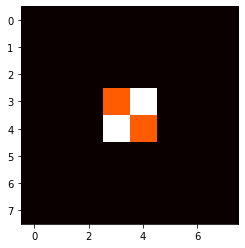

In [2]:
board = create_board()
print_board(board, 0)

Number of pieces on board:  5

Player 1 pieces = 4
Player 2 pieces = 1
Number of flipped pieces:  1
Number of pieces on board:  5


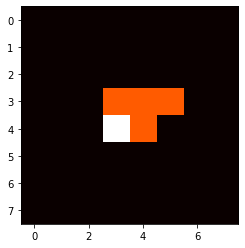

In [3]:
insert(3, 5, 1)

Number of pieces on board:  6

Player 1 pieces = 3
Player 2 pieces = 3
Number of flipped pieces:  1
Number of pieces on board:  6
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 2. 1. 1. 0. 0.]
 [0. 0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


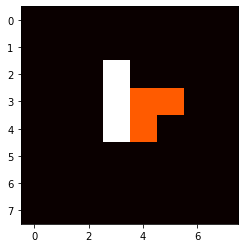

In [4]:
insert(2, 3, 2)

Number of pieces on board:  7

Player 1 pieces = 5
Player 2 pieces = 2
Number of flipped pieces:  1
Number of pieces on board:  7
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 2. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


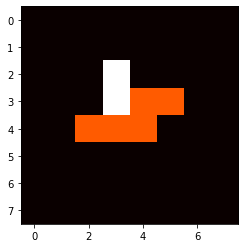

In [5]:
insert(4, 2, 1)

Number of pieces on board:  8

Player 1 pieces = 3
Player 2 pieces = 5
Number of flipped pieces:  2
Number of pieces on board:  8
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 2. 2. 2. 2. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


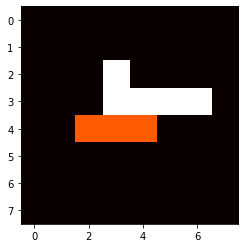

In [6]:
insert(3, 6, 2)

Number of pieces on board:  9

Player 1 pieces = 6
Player 2 pieces = 3
Number of flipped pieces:  2
Number of pieces on board:  9
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 2. 2. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


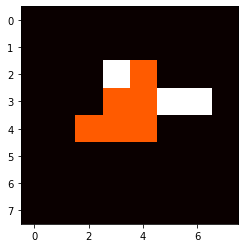

In [7]:
insert(2, 4, 1)

Number of pieces on board:  10

Player 1 pieces = 4
Player 2 pieces = 6
Number of flipped pieces:  2
Number of pieces on board:  10
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 2. 2. 2. 2. 2. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


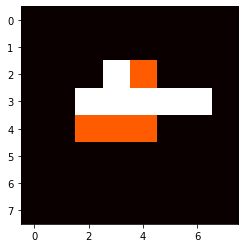

In [8]:
insert(3, 2, 2)

Number of pieces on board:  11

Player 1 pieces = 8
Player 2 pieces = 3
Number of flipped pieces:  3
Number of pieces on board:  11
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 2. 2. 2. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


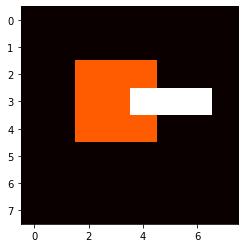

In [9]:
insert(2,2,1)

Number of pieces on board:  12

Player 1 pieces = 6
Player 2 pieces = 6
Number of flipped pieces:  2
Number of pieces on board:  12
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 2. 2. 2. 2. 2. 2. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


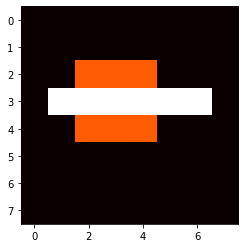

In [10]:
insert(3,1,2)

Number of pieces on board:  13

Player 1 pieces = 8
Player 2 pieces = 5
Number of flipped pieces:  1
Number of pieces on board:  13
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 2. 2. 2. 1. 2. 2. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


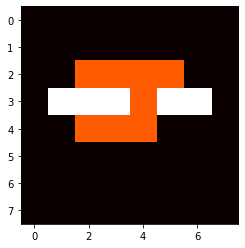

In [11]:
insert(2,5,1)

Number of pieces on board:  14

Player 1 pieces = 5
Player 2 pieces = 9
Number of flipped pieces:  3
Number of pieces on board:  14
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 2. 2. 2. 1. 2. 2. 0.]
 [0. 0. 2. 2. 2. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


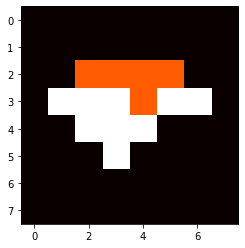

In [12]:
insert(5,3,2)

Number of pieces on board:  15

Player 1 pieces = 9
Player 2 pieces = 6
Number of flipped pieces:  3
Number of pieces on board:  15
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 2. 2. 0.]
 [0. 0. 2. 2. 2. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


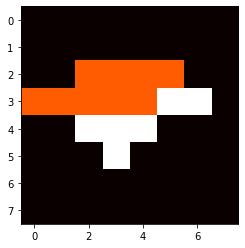

In [13]:
insert(3,0,1)

Number of pieces on board:  16

Player 1 pieces = 6
Player 2 pieces = 10
Number of flipped pieces:  3
Number of pieces on board:  16
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 1. 1. 2. 2. 0. 0.]
 [1. 1. 1. 2. 1. 2. 2. 0.]
 [0. 0. 2. 2. 2. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


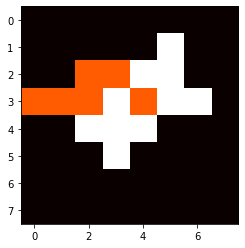

In [14]:
insert(1,5,2)

Number of pieces on board:  17

Player 1 pieces = 9
Player 2 pieces = 8
Number of flipped pieces:  2
Number of pieces on board:  17
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 1. 1. 2. 2. 0. 0.]
 [1. 1. 1. 2. 1. 1. 1. 1.]
 [0. 0. 2. 2. 2. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


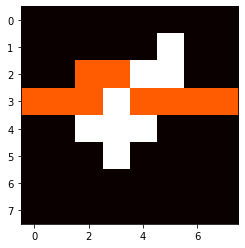

In [15]:
insert(3,7,1)

Number of pieces on board:  18

Player 1 pieces = 8
Player 2 pieces = 10
Number of flipped pieces:  1
Number of pieces on board:  18
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 1. 1. 2. 2. 0. 0.]
 [1. 1. 1. 2. 1. 2. 1. 1.]
 [0. 0. 2. 2. 2. 2. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


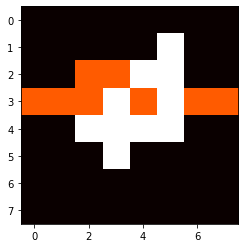

In [16]:
insert(4,5,2)

Number of pieces on board:  19

Player 1 pieces = 11
Player 2 pieces = 8
Number of flipped pieces:  2
Number of pieces on board:  19
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 1. 1. 2. 2. 0. 0.]
 [1. 1. 1. 1. 1. 2. 1. 1.]
 [0. 0. 2. 2. 1. 2. 0. 0.]
 [0. 0. 0. 2. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


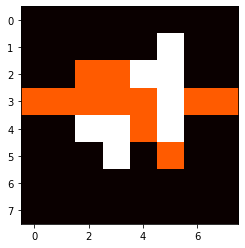

In [17]:
insert(5,5,1)

Number of pieces on board:  20

Player 1 pieces = 10
Player 2 pieces = 10
Number of flipped pieces:  1
Number of pieces on board:  20
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 1. 1. 2. 2. 0. 0.]
 [1. 1. 1. 1. 1. 2. 1. 1.]
 [0. 0. 2. 2. 1. 2. 0. 0.]
 [0. 0. 0. 2. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


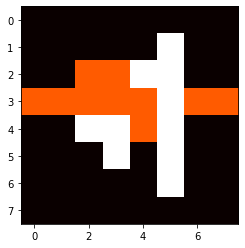

In [18]:
insert(6,5,2)

Number of pieces on board:  21

Player 1 pieces = 13
Player 2 pieces = 8
Number of flipped pieces:  2
Number of pieces on board:  21
[[0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 1. 2. 0. 0.]
 [1. 1. 1. 1. 1. 2. 1. 1.]
 [0. 0. 2. 2. 1. 2. 0. 0.]
 [0. 0. 0. 2. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


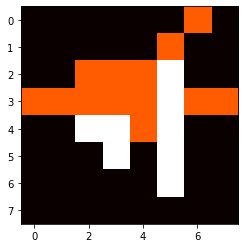

In [19]:
insert(0,6,1)

Number of pieces on board:  22

Player 1 pieces = 9
Player 2 pieces = 13
Number of flipped pieces:  4
Number of pieces on board:  22
[[0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 2. 0. 0. 1. 0. 0.]
 [0. 0. 2. 2. 1. 2. 0. 0.]
 [1. 1. 2. 1. 2. 2. 1. 1.]
 [0. 0. 2. 2. 1. 2. 0. 0.]
 [0. 0. 0. 2. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


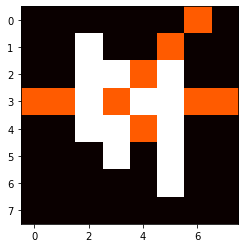

In [20]:
insert(1,2,2)

Number of pieces on board:  23

Player 1 pieces = 15
Player 2 pieces = 8
Number of flipped pieces:  5
Number of pieces on board:  23
[[0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 2. 0. 0. 1. 0. 0.]
 [0. 0. 2. 2. 1. 1. 0. 0.]
 [1. 1. 2. 1. 2. 1. 1. 1.]
 [0. 0. 2. 2. 1. 1. 0. 0.]
 [0. 0. 0. 2. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


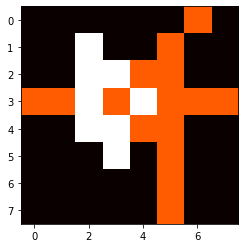

In [21]:
insert(7,5,1)

Number of pieces on board:  24

Player 1 pieces = 11
Player 2 pieces = 13
Number of flipped pieces:  4
Number of pieces on board:  24
[[0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 2. 0. 0. 1. 0. 0.]
 [0. 0. 2. 2. 2. 2. 2. 0.]
 [1. 1. 2. 1. 2. 2. 1. 1.]
 [0. 0. 2. 2. 2. 1. 0. 0.]
 [0. 0. 0. 2. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


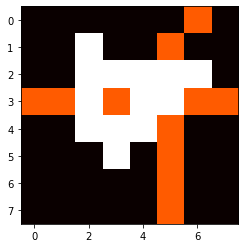

In [22]:
insert(2,6,2)

Number of pieces on board:  25

Player 1 pieces = 14
Player 2 pieces = 11
Number of flipped pieces:  2
Number of pieces on board:  25
[[0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 2. 1. 0. 1. 0. 0.]
 [0. 0. 1. 1. 2. 2. 2. 0.]
 [1. 1. 2. 1. 2. 2. 1. 1.]
 [0. 0. 2. 2. 2. 1. 0. 0.]
 [0. 0. 0. 2. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


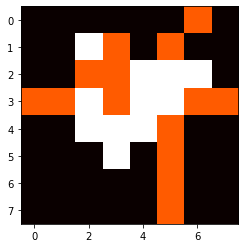

In [23]:
insert(1,3,1)

Number of pieces on board:  26

Player 1 pieces = 13
Player 2 pieces = 13
Number of flipped pieces:  1
Number of pieces on board:  26
[[0. 0. 0. 0. 2. 0. 1. 0.]
 [0. 0. 2. 1. 0. 2. 0. 0.]
 [0. 0. 1. 1. 2. 2. 2. 0.]
 [1. 1. 2. 1. 2. 2. 1. 1.]
 [0. 0. 2. 2. 2. 1. 0. 0.]
 [0. 0. 0. 2. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


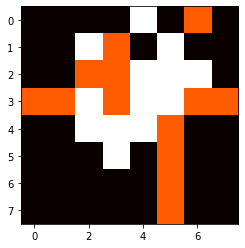

In [24]:
insert(0,4,2)

Number of pieces on board:  27

Player 1 pieces = 17
Player 2 pieces = 10
Number of flipped pieces:  3
Number of pieces on board:  27
[[0. 0. 0. 0. 2. 0. 1. 0.]
 [0. 0. 2. 1. 0. 2. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 2. 1. 2. 2. 1. 1.]
 [0. 0. 2. 2. 2. 1. 0. 0.]
 [0. 0. 0. 2. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


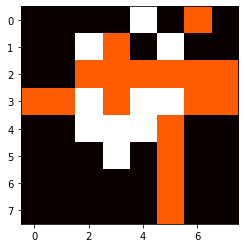

In [25]:
insert(2,7,1)

Number of pieces on board:  28

Player 1 pieces = 14
Player 2 pieces = 14
Number of flipped pieces:  3
Number of pieces on board:  28
[[0. 0. 0. 2. 2. 0. 1. 0.]
 [0. 0. 2. 2. 0. 2. 0. 0.]
 [0. 0. 1. 2. 1. 1. 1. 1.]
 [1. 1. 2. 2. 2. 2. 1. 1.]
 [0. 0. 2. 2. 2. 1. 0. 0.]
 [0. 0. 0. 2. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


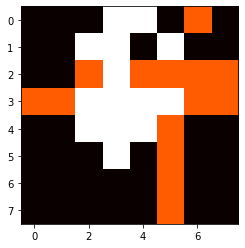

In [26]:
insert(0,3,2)

Number of pieces on board:  29

Player 1 pieces = 19
Player 2 pieces = 10
Number of flipped pieces:  4
Number of pieces on board:  29
[[0. 0. 0. 2. 2. 0. 1. 0.]
 [0. 0. 2. 2. 0. 2. 0. 0.]
 [0. 0. 1. 2. 1. 1. 1. 1.]
 [1. 1. 1. 2. 1. 2. 1. 1.]
 [0. 0. 1. 1. 2. 1. 0. 0.]
 [0. 0. 1. 2. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


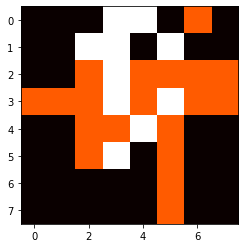

In [27]:
insert(5,2,1)

Number of pieces on board:  30

Player 1 pieces = 17
Player 2 pieces = 13
Number of flipped pieces:  2
Number of pieces on board:  30
[[0. 0. 0. 2. 2. 0. 1. 0.]
 [0. 0. 2. 2. 2. 2. 0. 0.]
 [0. 0. 1. 2. 2. 1. 1. 1.]
 [1. 1. 1. 2. 2. 2. 1. 1.]
 [0. 0. 1. 1. 2. 1. 0. 0.]
 [0. 0. 1. 2. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


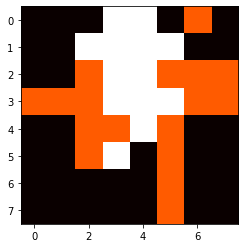

In [28]:
insert(1,4,2)

Number of pieces on board:  31

Player 1 pieces = 21
Player 2 pieces = 10
Number of flipped pieces:  3
Number of pieces on board:  31
[[0. 0. 0. 2. 2. 0. 1. 0.]
 [0. 0. 2. 2. 2. 2. 0. 0.]
 [0. 0. 1. 2. 2. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


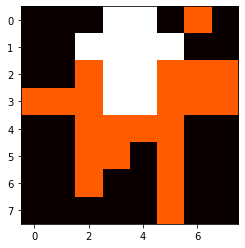

In [29]:
insert(6,2,1)

Number of pieces on board:  32

Player 1 pieces = 16
Player 2 pieces = 16
Number of flipped pieces:  5
Number of pieces on board:  32
[[0. 0. 0. 2. 2. 0. 1. 0.]
 [0. 0. 2. 2. 2. 2. 0. 0.]
 [0. 0. 2. 2. 2. 1. 1. 1.]
 [1. 1. 2. 2. 2. 1. 1. 1.]
 [0. 0. 2. 1. 1. 1. 0. 0.]
 [0. 0. 2. 1. 0. 1. 0. 0.]
 [0. 0. 2. 0. 0. 1. 0. 0.]
 [0. 0. 2. 0. 0. 1. 0. 0.]]


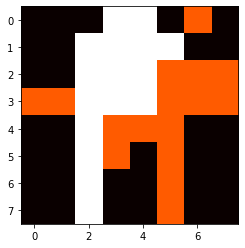

In [30]:
insert(7,2,2)

Number of pieces on board:  33

Player 1 pieces = 20
Player 2 pieces = 13
Number of flipped pieces:  3
Number of pieces on board:  33
[[0. 1. 0. 2. 2. 0. 1. 0.]
 [0. 0. 1. 2. 2. 2. 0. 0.]
 [0. 0. 2. 1. 2. 1. 1. 1.]
 [1. 1. 2. 2. 1. 1. 1. 1.]
 [0. 0. 2. 1. 1. 1. 0. 0.]
 [0. 0. 2. 1. 0. 1. 0. 0.]
 [0. 0. 2. 0. 0. 1. 0. 0.]
 [0. 0. 2. 0. 0. 1. 0. 0.]]


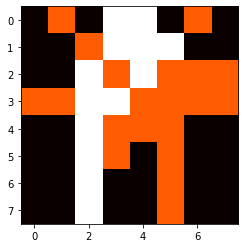

In [31]:
insert(0,1,1)

Number of pieces on board:  34

Player 1 pieces = 16
Player 2 pieces = 18
Number of flipped pieces:  4
Number of pieces on board:  34
[[0. 1. 0. 2. 2. 0. 1. 0.]
 [0. 0. 1. 2. 2. 2. 0. 0.]
 [0. 0. 2. 1. 2. 1. 1. 1.]
 [1. 1. 2. 2. 2. 1. 1. 1.]
 [0. 0. 2. 2. 2. 1. 0. 0.]
 [0. 0. 2. 2. 2. 1. 0. 0.]
 [0. 0. 2. 0. 0. 1. 0. 0.]
 [0. 0. 2. 0. 0. 1. 0. 0.]]


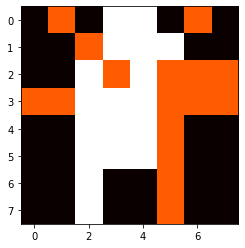

In [32]:
insert(5,4,2)

Number of pieces on board:  35

Player 1 pieces = 19
Player 2 pieces = 16
Number of flipped pieces:  2
Number of pieces on board:  35
[[0. 1. 0. 2. 2. 0. 1. 0.]
 [0. 0. 1. 2. 2. 2. 0. 0.]
 [0. 0. 2. 1. 2. 1. 1. 1.]
 [1. 1. 2. 2. 2. 1. 1. 1.]
 [0. 0. 1. 2. 2. 1. 0. 0.]
 [0. 0. 2. 1. 2. 1. 0. 0.]
 [0. 0. 2. 0. 1. 1. 0. 0.]
 [0. 0. 2. 0. 0. 1. 0. 0.]]


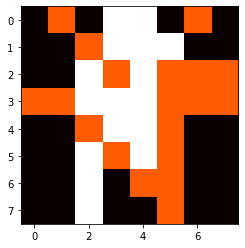

In [33]:
insert(6,4,1)

Number of pieces on board:  36

Player 1 pieces = 18
Player 2 pieces = 18
Number of flipped pieces:  1
Number of pieces on board:  36
[[0. 1. 0. 2. 2. 0. 1. 0.]
 [0. 0. 1. 2. 2. 2. 0. 0.]
 [0. 0. 2. 1. 2. 1. 1. 1.]
 [1. 1. 2. 2. 2. 1. 1. 1.]
 [0. 0. 1. 2. 2. 1. 0. 0.]
 [0. 0. 2. 1. 2. 1. 0. 0.]
 [0. 0. 2. 0. 2. 1. 0. 0.]
 [0. 0. 2. 0. 2. 1. 0. 0.]]


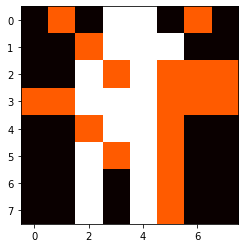

In [34]:
insert(7,4,2)

Number of pieces on board:  37

Player 1 pieces = 21
Player 2 pieces = 16
Number of flipped pieces:  2
Number of pieces on board:  37
[[0. 1. 0. 2. 2. 0. 1. 0.]
 [0. 0. 1. 2. 2. 2. 0. 0.]
 [0. 0. 2. 1. 2. 1. 1. 1.]
 [1. 1. 2. 2. 2. 1. 1. 1.]
 [0. 0. 1. 2. 2. 1. 0. 0.]
 [0. 0. 2. 1. 1. 1. 0. 0.]
 [0. 0. 2. 1. 1. 1. 0. 0.]
 [0. 0. 2. 0. 2. 1. 0. 0.]]


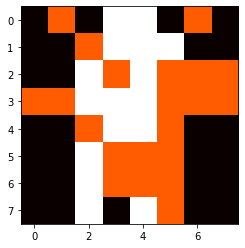

In [35]:
insert(6,3,1)

Number of pieces on board:  38

Player 1 pieces = 18
Player 2 pieces = 20
Number of flipped pieces:  3
Number of pieces on board:  38
[[0. 1. 0. 2. 2. 0. 1. 0.]
 [0. 0. 1. 2. 2. 2. 0. 0.]
 [0. 0. 2. 1. 2. 1. 1. 1.]
 [1. 1. 2. 2. 2. 1. 1. 1.]
 [0. 0. 1. 2. 2. 1. 0. 0.]
 [0. 0. 2. 1. 2. 1. 0. 0.]
 [0. 0. 2. 1. 1. 2. 0. 0.]
 [0. 0. 2. 0. 2. 2. 2. 0.]]


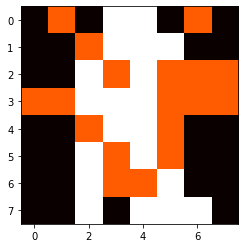

In [36]:
insert(7,6,2)

Number of pieces on board:  39

Player 1 pieces = 20
Player 2 pieces = 19
Number of flipped pieces:  1
Number of pieces on board:  39
[[0. 1. 0. 2. 2. 0. 1. 0.]
 [0. 0. 1. 2. 2. 2. 0. 0.]
 [0. 0. 2. 1. 2. 1. 1. 1.]
 [1. 1. 2. 2. 2. 1. 1. 1.]
 [0. 0. 1. 2. 2. 1. 0. 0.]
 [0. 1. 1. 1. 2. 1. 0. 0.]
 [0. 0. 2. 1. 1. 2. 0. 0.]
 [0. 0. 2. 0. 2. 2. 2. 0.]]


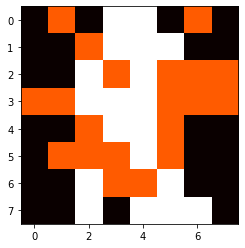

In [37]:
insert(5,1,1)

Number of pieces on board:  40

Player 1 pieces = 17
Player 2 pieces = 23
Number of flipped pieces:  3
Number of pieces on board:  40
[[0. 1. 0. 2. 2. 0. 1. 0.]
 [0. 0. 1. 2. 2. 2. 0. 0.]
 [0. 0. 2. 1. 2. 1. 1. 1.]
 [1. 1. 2. 2. 2. 1. 1. 1.]
 [0. 0. 1. 2. 2. 1. 0. 0.]
 [2. 2. 2. 2. 2. 1. 0. 0.]
 [0. 0. 2. 1. 1. 2. 0. 0.]
 [0. 0. 2. 0. 2. 2. 2. 0.]]


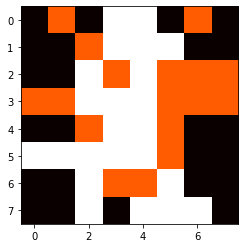

In [38]:
insert(5,0,2)

Number of pieces on board:  41

Player 1 pieces = 21
Player 2 pieces = 20
Number of flipped pieces:  3
Number of pieces on board:  41
[[0. 1. 0. 2. 2. 0. 1. 0.]
 [0. 1. 1. 2. 2. 2. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 1.]
 [1. 1. 2. 1. 2. 1. 1. 1.]
 [0. 0. 1. 2. 1. 1. 0. 0.]
 [2. 2. 2. 2. 2. 1. 0. 0.]
 [0. 0. 2. 1. 1. 2. 0. 0.]
 [0. 0. 2. 0. 2. 2. 2. 0.]]


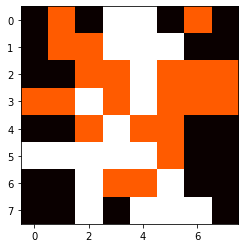

In [39]:
insert(1,1,1)

Number of pieces on board:  42

Player 1 pieces = 20
Player 2 pieces = 22
Number of flipped pieces:  1
Number of pieces on board:  42
[[0. 1. 0. 2. 2. 0. 1. 0.]
 [0. 1. 1. 2. 2. 2. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 1.]
 [1. 1. 2. 1. 2. 1. 1. 1.]
 [0. 0. 1. 2. 1. 1. 0. 0.]
 [2. 2. 2. 2. 2. 1. 0. 0.]
 [0. 0. 2. 2. 1. 2. 0. 0.]
 [0. 0. 2. 2. 2. 2. 2. 0.]]


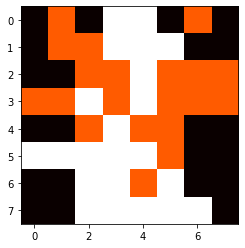

In [40]:
insert(7,3,2)

Number of pieces on board:  43

Player 1 pieces = 22
Player 2 pieces = 21
Number of flipped pieces:  1
Number of pieces on board:  43
[[0. 1. 0. 2. 2. 0. 1. 0.]
 [0. 1. 1. 2. 2. 2. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 1.]
 [1. 1. 2. 1. 2. 1. 1. 1.]
 [0. 0. 1. 2. 1. 1. 0. 0.]
 [2. 2. 2. 2. 2. 1. 0. 0.]
 [0. 0. 2. 2. 1. 1. 1. 0.]
 [0. 0. 2. 2. 2. 2. 2. 0.]]


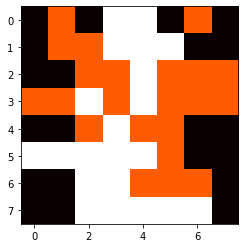

In [41]:
insert(6,6,1)

Number of pieces on board:  44

Player 1 pieces = 21
Player 2 pieces = 23
Number of flipped pieces:  1
Number of pieces on board:  44
[[0. 1. 0. 2. 2. 0. 1. 0.]
 [0. 1. 1. 2. 2. 2. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 1.]
 [1. 1. 2. 1. 2. 1. 1. 1.]
 [0. 2. 2. 2. 1. 1. 0. 0.]
 [2. 2. 2. 2. 2. 1. 0. 0.]
 [0. 0. 2. 2. 1. 1. 1. 0.]
 [0. 0. 2. 2. 2. 2. 2. 0.]]


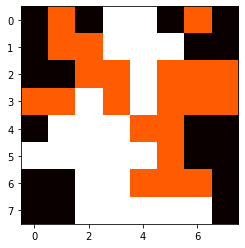

In [42]:
insert(4,1,2)

Number of pieces on board:  45

Player 1 pieces = 29
Player 2 pieces = 16
Number of flipped pieces:  7
Number of pieces on board:  45
[[0. 1. 0. 2. 2. 0. 1. 0.]
 [0. 1. 1. 2. 2. 2. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 1.]
 [1. 1. 2. 1. 1. 1. 1. 1.]
 [0. 1. 2. 1. 1. 1. 0. 0.]
 [2. 1. 1. 2. 2. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 2. 2. 2. 2. 2. 0.]]


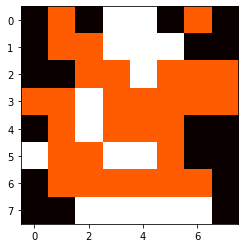

In [43]:
insert(6,1,1)

Number of pieces on board:  46

Player 1 pieces = 27
Player 2 pieces = 19
Number of flipped pieces:  2
Number of pieces on board:  46
[[0. 1. 0. 2. 2. 0. 1. 0.]
 [2. 2. 2. 2. 2. 2. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 1.]
 [1. 1. 2. 1. 1. 1. 1. 1.]
 [0. 1. 2. 1. 1. 1. 0. 0.]
 [2. 1. 1. 2. 2. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 2. 2. 2. 2. 2. 0.]]


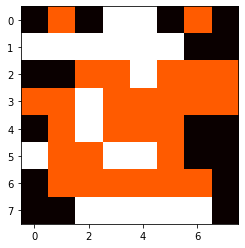

In [44]:
insert(1,0,2)

Number of pieces on board:  47

Player 1 pieces = 29
Player 2 pieces = 18
Number of flipped pieces:  1
Number of pieces on board:  47
[[1. 1. 0. 2. 2. 0. 1. 0.]
 [2. 1. 2. 2. 2. 2. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 1.]
 [1. 1. 2. 1. 1. 1. 1. 1.]
 [0. 1. 2. 1. 1. 1. 0. 0.]
 [2. 1. 1. 2. 2. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 2. 2. 2. 2. 2. 0.]]


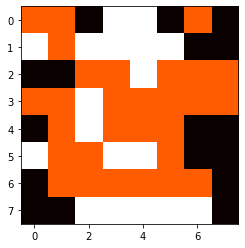

In [45]:
insert(0,0,1)

Number of pieces on board:  48

Player 1 pieces = 23
Player 2 pieces = 25
Number of flipped pieces:  6
Number of pieces on board:  48
[[1. 1. 0. 2. 2. 0. 1. 0.]
 [2. 1. 2. 2. 2. 2. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 1.]
 [1. 1. 2. 1. 1. 2. 1. 1.]
 [0. 1. 2. 2. 2. 2. 2. 0.]
 [2. 1. 1. 2. 2. 2. 0. 0.]
 [0. 1. 1. 1. 2. 1. 1. 0.]
 [0. 0. 2. 2. 2. 2. 2. 0.]]


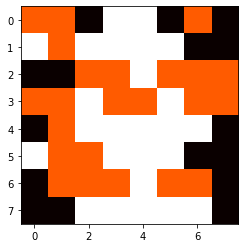

In [46]:
insert(4,6,2)

Number of pieces on board:  49

Player 1 pieces = 25
Player 2 pieces = 24
Number of flipped pieces:  1
Number of pieces on board:  49
[[1. 1. 1. 2. 2. 0. 1. 0.]
 [2. 1. 1. 2. 2. 2. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 1.]
 [1. 1. 2. 1. 1. 2. 1. 1.]
 [0. 1. 2. 2. 2. 2. 2. 0.]
 [2. 1. 1. 2. 2. 2. 0. 0.]
 [0. 1. 1. 1. 2. 1. 1. 0.]
 [0. 0. 2. 2. 2. 2. 2. 0.]]


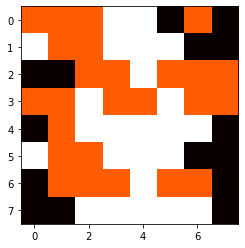

In [47]:
insert(0,2,1)

Number of pieces on board:  50

Player 1 pieces = 24
Player 2 pieces = 26
Number of flipped pieces:  1
Number of pieces on board:  50
[[1. 1. 1. 2. 2. 0. 1. 0.]
 [2. 1. 1. 2. 2. 2. 0. 0.]
 [2. 0. 1. 1. 2. 1. 1. 1.]
 [1. 2. 2. 1. 1. 2. 1. 1.]
 [0. 1. 2. 2. 2. 2. 2. 0.]
 [2. 1. 1. 2. 2. 2. 0. 0.]
 [0. 1. 1. 1. 2. 1. 1. 0.]
 [0. 0. 2. 2. 2. 2. 2. 0.]]


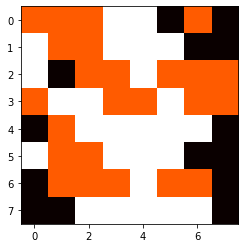

In [48]:
insert(2,0,2)

Number of pieces on board:  51

Player 1 pieces = 29
Player 2 pieces = 22
Number of flipped pieces:  4
Number of pieces on board:  51
[[1. 1. 1. 1. 1. 1. 1. 0.]
 [2. 1. 1. 2. 1. 1. 0. 0.]
 [2. 0. 1. 1. 2. 1. 1. 1.]
 [1. 2. 2. 1. 1. 2. 1. 1.]
 [0. 1. 2. 2. 2. 2. 2. 0.]
 [2. 1. 1. 2. 2. 2. 0. 0.]
 [0. 1. 1. 1. 2. 1. 1. 0.]
 [0. 0. 2. 2. 2. 2. 2. 0.]]


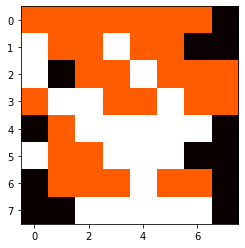

In [49]:
insert(0,5,1)

Number of pieces on board:  52

Player 1 pieces = 28
Player 2 pieces = 24
Number of flipped pieces:  1
Number of pieces on board:  52
[[1. 1. 1. 1. 1. 1. 1. 0.]
 [2. 1. 1. 2. 1. 1. 0. 0.]
 [2. 0. 1. 1. 2. 1. 1. 1.]
 [1. 2. 2. 1. 1. 2. 1. 1.]
 [0. 1. 2. 2. 2. 2. 2. 0.]
 [2. 1. 1. 2. 2. 2. 0. 2.]
 [0. 1. 1. 1. 2. 1. 2. 0.]
 [0. 0. 2. 2. 2. 2. 2. 0.]]


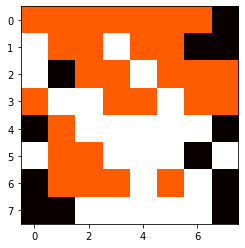

In [50]:
insert(5,7,2)

Number of pieces on board:  53

Player 1 pieces = 33
Player 2 pieces = 20
Number of flipped pieces:  4
Number of pieces on board:  53
[[1. 1. 1. 1. 1. 1. 1. 0.]
 [2. 1. 1. 2. 1. 1. 0. 0.]
 [2. 1. 1. 1. 2. 1. 1. 1.]
 [1. 1. 1. 1. 1. 2. 1. 1.]
 [0. 1. 2. 1. 2. 2. 2. 0.]
 [2. 1. 1. 2. 1. 2. 0. 2.]
 [0. 1. 1. 1. 2. 1. 2. 0.]
 [0. 0. 2. 2. 2. 2. 2. 0.]]


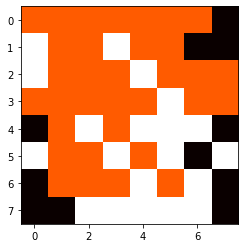

In [51]:
insert(2,1,1)

Number of pieces on board:  54

Player 1 pieces = 32
Player 2 pieces = 22
Number of flipped pieces:  1
Number of pieces on board:  54
[[1. 1. 1. 1. 1. 1. 1. 0.]
 [2. 1. 1. 2. 1. 1. 0. 0.]
 [2. 1. 1. 1. 2. 1. 1. 1.]
 [1. 1. 1. 1. 1. 2. 1. 1.]
 [0. 1. 2. 1. 2. 2. 2. 0.]
 [2. 1. 1. 2. 1. 2. 2. 2.]
 [0. 1. 1. 1. 2. 2. 2. 0.]
 [0. 0. 2. 2. 2. 2. 2. 0.]]


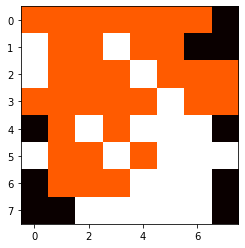

In [52]:
insert(5,6,2)

Number of pieces on board:  55

Player 1 pieces = 36
Player 2 pieces = 19
Number of flipped pieces:  3
Number of pieces on board:  55
[[1. 1. 1. 1. 1. 1. 1. 0.]
 [2. 1. 1. 2. 1. 1. 0. 0.]
 [2. 1. 1. 1. 2. 1. 1. 1.]
 [1. 1. 1. 1. 1. 2. 1. 1.]
 [0. 1. 2. 1. 1. 2. 2. 0.]
 [2. 1. 1. 2. 1. 1. 2. 2.]
 [0. 1. 1. 1. 2. 2. 1. 0.]
 [0. 0. 2. 2. 2. 2. 2. 1.]]


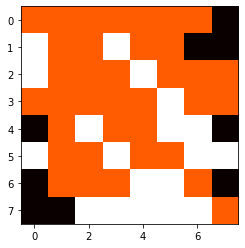

In [53]:
insert(7,7,1)

Number of pieces on board:  56

Player 1 pieces = 32
Player 2 pieces = 24
Number of flipped pieces:  4
Number of pieces on board:  56
[[1. 1. 1. 1. 1. 1. 1. 0.]
 [2. 1. 1. 2. 1. 1. 0. 0.]
 [2. 1. 1. 1. 2. 1. 1. 1.]
 [1. 1. 1. 1. 1. 2. 1. 1.]
 [0. 1. 2. 1. 1. 2. 2. 0.]
 [2. 2. 1. 2. 1. 1. 2. 2.]
 [2. 2. 2. 2. 2. 2. 1. 0.]
 [0. 0. 2. 2. 2. 2. 2. 1.]]


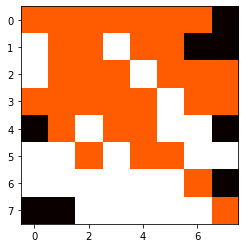

In [54]:
insert(6,0,2)

Number of pieces on board:  57

Player 1 pieces = 33
Player 2 pieces = 24
Number of flipped pieces:  0
Number of pieces on board:  57
[[1. 1. 1. 1. 1. 1. 1. 0.]
 [2. 1. 1. 2. 1. 1. 0. 0.]
 [2. 1. 1. 1. 2. 1. 1. 1.]
 [1. 1. 1. 1. 1. 2. 1. 1.]
 [1. 1. 2. 1. 1. 2. 2. 0.]
 [2. 2. 1. 2. 1. 1. 2. 2.]
 [2. 2. 2. 2. 2. 2. 1. 0.]
 [0. 0. 2. 2. 2. 2. 2. 1.]]


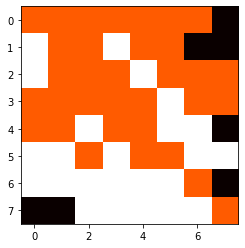

In [55]:
insert(4,0,1)

Number of pieces on board:  58

Player 1 pieces = 25
Player 2 pieces = 33
Number of flipped pieces:  8
Number of pieces on board:  58
[[1. 1. 1. 1. 1. 1. 1. 0.]
 [2. 1. 1. 2. 2. 2. 2. 0.]
 [2. 1. 1. 1. 2. 2. 2. 1.]
 [1. 1. 1. 1. 2. 2. 2. 1.]
 [1. 1. 2. 2. 1. 2. 2. 0.]
 [2. 2. 2. 2. 1. 1. 2. 2.]
 [2. 2. 2. 2. 2. 2. 1. 0.]
 [0. 0. 2. 2. 2. 2. 2. 1.]]


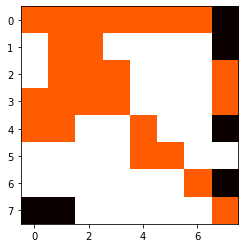

In [56]:
insert(1,6,2)

Number of pieces on board:  59

Player 1 pieces = 35
Player 2 pieces = 24
Number of flipped pieces:  9
Number of pieces on board:  59
[[1. 1. 1. 1. 1. 1. 1. 0.]
 [2. 1. 1. 2. 2. 2. 2. 0.]
 [2. 1. 1. 1. 2. 2. 2. 1.]
 [1. 1. 1. 1. 2. 2. 2. 1.]
 [1. 1. 2. 2. 1. 2. 2. 0.]
 [2. 1. 2. 1. 1. 1. 2. 2.]
 [2. 1. 1. 2. 2. 2. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


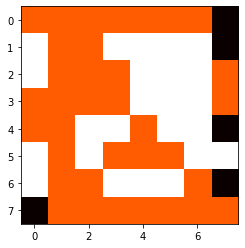

In [57]:
insert(7,1,1)

Number of pieces on board:  60

Player 1 pieces = 34
Player 2 pieces = 26
Number of flipped pieces:  1
Number of pieces on board:  60
[[1. 1. 1. 1. 1. 1. 1. 0.]
 [2. 1. 1. 2. 2. 2. 2. 0.]
 [2. 1. 1. 1. 2. 2. 2. 1.]
 [1. 1. 1. 1. 2. 2. 2. 1.]
 [1. 1. 2. 2. 1. 2. 2. 0.]
 [2. 1. 2. 1. 1. 1. 2. 2.]
 [2. 2. 1. 2. 2. 2. 1. 0.]
 [2. 1. 1. 1. 1. 1. 1. 1.]]


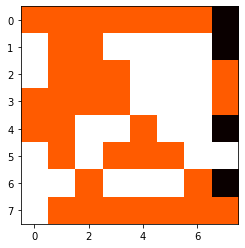

In [58]:
insert(7,0,2)

Number of pieces on board:  61

Player 1 pieces = 38
Player 2 pieces = 23
Number of flipped pieces:  3
Number of pieces on board:  61
[[1. 1. 1. 1. 1. 1. 1. 0.]
 [2. 1. 1. 2. 2. 2. 2. 0.]
 [2. 1. 1. 1. 2. 2. 2. 1.]
 [1. 1. 1. 1. 1. 2. 2. 1.]
 [1. 1. 2. 2. 1. 1. 2. 0.]
 [2. 1. 2. 1. 1. 1. 1. 2.]
 [2. 2. 1. 2. 2. 2. 1. 1.]
 [2. 1. 1. 1. 1. 1. 1. 1.]]


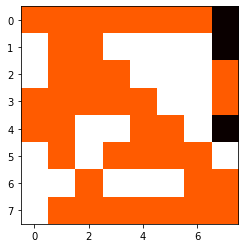

In [59]:
insert(6,7,1)

Number of pieces on board:  62

Player 1 pieces = 37
Player 2 pieces = 25
Number of flipped pieces:  1
Number of pieces on board:  62
[[1. 1. 1. 1. 1. 1. 1. 0.]
 [2. 1. 1. 2. 2. 2. 2. 0.]
 [2. 1. 1. 1. 2. 2. 2. 1.]
 [1. 1. 1. 1. 1. 2. 2. 1.]
 [1. 1. 2. 2. 1. 1. 2. 2.]
 [2. 1. 2. 1. 1. 1. 2. 2.]
 [2. 2. 1. 2. 2. 2. 1. 1.]
 [2. 1. 1. 1. 1. 1. 1. 1.]]


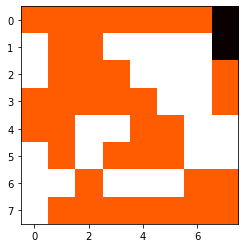

In [60]:
insert(4,7,2)

Number of pieces on board:  63

Player 1 pieces = 44
Player 2 pieces = 19
Number of flipped pieces:  6
Number of pieces on board:  63
[[1. 1. 1. 1. 1. 1. 1. 0.]
 [2. 1. 1. 1. 1. 1. 1. 1.]
 [2. 1. 1. 1. 2. 2. 1. 1.]
 [1. 1. 1. 1. 1. 1. 2. 1.]
 [1. 1. 2. 2. 1. 1. 2. 2.]
 [2. 1. 2. 1. 1. 1. 2. 2.]
 [2. 2. 1. 2. 2. 2. 1. 1.]
 [2. 1. 1. 1. 1. 1. 1. 1.]]


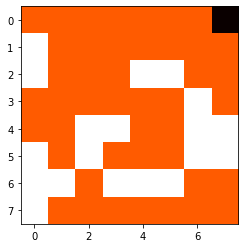

In [61]:
insert(1,7,1)

Number of pieces on board:  64

Player 1 pieces = 40
Player 2 pieces = 24
Number of flipped pieces:  4
Number of pieces on board:  64
[[1. 1. 1. 1. 1. 1. 1. 2.]
 [2. 1. 1. 1. 1. 1. 2. 2.]
 [2. 1. 1. 1. 2. 2. 1. 2.]
 [1. 1. 1. 1. 1. 1. 2. 2.]
 [1. 1. 2. 2. 1. 1. 2. 2.]
 [2. 1. 2. 1. 1. 1. 2. 2.]
 [2. 2. 1. 2. 2. 2. 1. 1.]
 [2. 1. 1. 1. 1. 1. 1. 1.]]


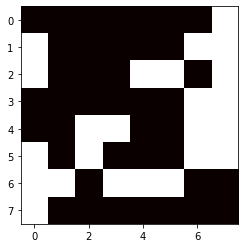

In [62]:
insert(0,7,2)

In [63]:
print("Player 1 score =", np.count_nonzero(board==1))
print("Player 2 score =", np.count_nonzero(board==2))

Player 1 score = 40
Player 2 score = 24
